This Notebook contain minmax scaling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split  # Untuk split data menjadi train dan test
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")
from sklearn.utils.testing import ignore_warnings

In [2]:
df = pd.read_csv('4.white_wine.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


x = density, alcoholl

y = quality(>6 = good wine = 1)

In [5]:
df['label'] = np.where(df['quality']>6,1,0)

<AxesSubplot:xlabel='density', ylabel='alcohol'>

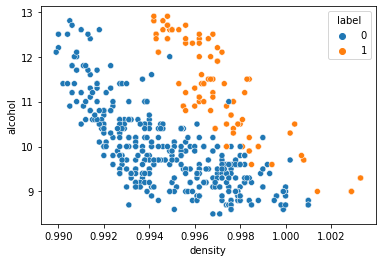

In [7]:
sns.scatterplot(x='density',y='alcohol',hue = 'label', data= df)


In [73]:
df[['alcohol','density']].isna().sum()

alcohol    1
density    0
dtype: int64

In [74]:
df['alcohol'].fillna(df['alcohol'].mean(), inplace = True) # mengisi nilai nan dengan nilai rata rata

In [75]:
x = df[['alcohol','density']]
y = df['label']

In [76]:
x_train, x_test, y_train, y_test = train_test_split (x,y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 2020)

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier (n_neighbors = 3) # save model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [79]:
y_predict = knn.predict(x_test)
y_predict

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [80]:
print('Akurasi dari model ini adalah = ',accuracy_score(y_test,y_predict))

Akurasi dari model ini adalah =  0.9038461538461539


akurasi model mencapai 90.38 %, dari 10 prediksi 9 benar

In [81]:
x

,alcohol,density
0,8.800000,1.0010
1,9.500000,0.9940
2,10.100000,0.9951
3,9.900000,0.9956
4,9.900000,0.9956
...,...,...
515,10.400000,0.9926
516,9.100000,0.9934
517,10.400000,0.9920
518,10.800000,0.9918


terdapat selisih dari 2 feature, alcohol = satuan, density bilangan float

# <center> Modelling With Scaling

In [57]:
u

In [58]:
scaler = MinMaxScaler()
scaler.fit(x_train) # Fitting dengan data train
x_train_scaled = scaler.transform(x_train) # Proses scaling
x_test_scaled = scaler.transform(x_test)   # Proses scaling

In [59]:
x_test_scaled

array([[0.36792055, 0.        , 0.01512699, ..., 0.        , 1.        ,
        0.        ],
       [0.40939935, 0.        , 0.01541158, ..., 0.        , 0.        ,
        0.        ],
       [0.33400352, 0.        , 0.05074862, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44709726, 0.        , 0.03035158, ..., 0.        , 0.        ,
        1.        ],
       [0.01985423, 0.33333333, 0.05445717, ..., 0.        , 0.        ,
        1.        ],
       [0.39683338, 0.        , 0.03093714, ..., 0.        , 0.        ,
        1.        ]])

In [60]:
knn = KNeighborsClassifier (n_neighbors = 17) # save model
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=17)

In [61]:
y_predict = knn.predict(x_test_scaled)

In [62]:
print('model accuracy in test dataset = ', accuracy_score(y_test,y_predict))

model accuracy in test dataset =  0.7653631284916201


ada peningkatan akurasi setelah dilakukan scaling, dari 90% menjadi 98%

# Choose Best K

In [63]:
k = range(1,30,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    
    y_predict_train = knn.predict(x_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test  = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k=i

In [64]:
testing_accuracy

[0.7150837988826816,
 0.7541899441340782,
 0.7821229050279329,
 0.7597765363128491,
 0.7486033519553073,
 0.7541899441340782,
 0.7486033519553073,
 0.7541899441340782,
 0.7653631284916201,
 0.770949720670391,
 0.770949720670391,
 0.7653631284916201,
 0.7597765363128491,
 0.7597765363128491,
 0.7486033519553073]

In [65]:
training_accuracy

[0.9859550561797753,
 0.8693820224719101,
 0.8553370786516854,
 0.8356741573033708,
 0.8328651685393258,
 0.8342696629213483,
 0.8300561797752809,
 0.824438202247191,
 0.824438202247191,
 0.8258426966292135,
 0.8216292134831461,
 0.8160112359550562,
 0.8103932584269663,
 0.8132022471910112,
 0.8146067415730337]

In [66]:
score, best_k

(0.7821229050279329, 5)

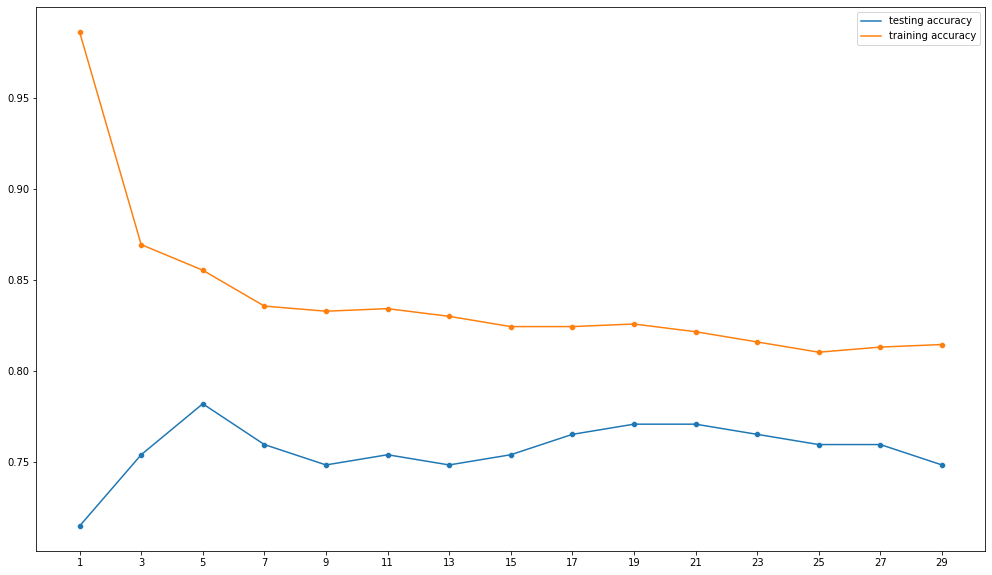

In [67]:
plt.figure(figsize = (17,10))
sns.lineplot(k,testing_accuracy)
sns.scatterplot(k,testing_accuracy)
sns.lineplot(k,training_accuracy)
sns.scatterplot(k,training_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [68]:
print('score = ', score, '\nbest k = ', best_k)

score =  0.7821229050279329 
best k =  5


# <center> Latihan

Tugas :
* Buat model knn untuk memprediksi apakah orang akan survive atau tidak menggunakan dataset titanic
* Carilah nilai k terbaik
* Bandingkan nilai k terbaik dengan scaling dan tanpa scaling (gunakan min max scaler

### Data Manipulation

In [27]:
tt = pd.read_csv("4.titanic.csv")
tt

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


In [28]:
tt_dummy = pd.get_dummies(tt, drop_first = True)
tt_dummy

,age,parch,fare,alone,sex_male,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,22.0,0,7.2500,False,1,0,1,0,0,0,0,0,0,0,1,0
1,38.0,0,71.2833,False,0,0,0,0,1,0,0,0,0,0,0,1
2,26.0,0,7.9250,True,0,0,1,0,0,0,0,0,0,0,1,1
3,35.0,0,53.1000,False,0,0,0,0,1,0,0,0,0,0,1,1
4,35.0,0,8.0500,True,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,13.0000,True,1,1,0,0,0,0,0,0,0,0,1,0
887,19.0,0,30.0000,True,0,0,0,1,0,0,0,0,0,0,1,1
888,NaN,2,23.4500,False,0,0,1,0,0,0,0,0,0,0,1,0
889,26.0,0,30.0000,True,1,0,0,0,1,0,0,0,0,0,0,1


In [29]:
tt_dummy['alone'] = np.where(tt_dummy['alone']==True,1,0)

In [30]:
tt_dummy['age'].fillna(tt_dummy['age'].mean(), inplace = True) # mengisi nilai nan dengan nilai rata rata

In [31]:
tt_dummy

,age,parch,fare,alone,sex_male,class_Second,class_Third,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,embark_town_Queenstown,embark_town_Southampton,alive_yes
0,22.000000,0,7.2500,0,1,0,1,0,0,0,0,0,0,0,1,0
1,38.000000,0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,1
2,26.000000,0,7.9250,1,0,0,1,0,0,0,0,0,0,0,1,1
3,35.000000,0,53.1000,0,0,0,0,0,1,0,0,0,0,0,1,1
4,35.000000,0,8.0500,1,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0,13.0000,1,1,1,0,0,0,0,0,0,0,0,1,0
887,19.000000,0,30.0000,1,0,0,0,1,0,0,0,0,0,0,1,1
888,29.699118,2,23.4500,0,0,0,1,0,0,0,0,0,0,0,1,0
889,26.000000,0,30.0000,1,1,0,0,0,1,0,0,0,0,0,0,1


### Splitting

In [32]:
x = tt_dummy.drop(['alive_yes'], axis = 1)
y = tt_dummy['alive_yes']

In [33]:
x_train, x_test, y_train, y_test = train_test_split (x,y,
                                                    stratify = y,
                                                    test_size = 0.2,
                                                    random_state = 2020)

### Modelling

In [34]:
knn = KNeighborsClassifier (n_neighbors = 3) # save model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_predict = knn.predict(x_test)
y_predict

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=uint8)

In [36]:
print('Akurasi dari model ini untuk memprediksi orang yang hidup adalah = ',accuracy_score(y_test,y_predict))

Akurasi dari model ini untuk memprediksi orang yang hidup adalah =  0.7262569832402235


### Modelling with Scaling

In [37]:
scaler = MinMaxScaler()
scaler.fit(x_train) # Fitting dengan data train
x_train_scaled = scaler.transform(x_train) # Proses scaling
x_test_scaled = scaler.transform(x_test)   # Proses scaling

In [38]:
knn = KNeighborsClassifier (n_neighbors = 5) # save model
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [39]:
y_predict = knn.predict(x_test_scaled)

In [40]:
print('Akurasi dari model ini untuk memprediksi orang yang hidup adalah = ',accuracy_score(y_test,y_predict))

Akurasi dari model ini untuk memprediksi orang yang hidup adalah =  0.7821229050279329


Setelah dilakukan scaling akurasi model naik sikit, lumayan lah

In [41]:
k = range(1,30,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled,y_train)
    
    y_predict_train = knn.predict(x_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test  = knn.predict(x_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k=i

In [42]:
print(f'Score terbaik untuk model scaled adalah = {score} \nbest k terbaik untuk model scaled adalah ={best_k}')

Score terbaik untuk model scaled adalah = 0.7821229050279329 
best k terbaik untuk model scaled adalah =5


In [43]:
k = range(1,30,2)
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    
    y_predict_train = knn.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test  = knn.predict(x_test)
    acc_score = accuracy_score(y_test,y_predict_test)
    testing_accuracy.append(acc_score)
    
    if score < acc_score:
        score = acc_score
        best_k=i

In [44]:
print(f'Score terbaik untuk model non scaled adalah = {score} \nbest k terbaik untuk model non scaled adalah ={best_k}')

Score terbaik untuk model non scaled adalah = 0.7262569832402235 
best k terbaik untuk model non scaled adalah =3


# <center> Kesimpulan
* Model optimal dengan dilakukan scaling dan nilai k = 5